## TIME Series Analysis

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import pylab as pl
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


**1. First thing to do is to gather the data:**

In [2]:
mtaRides = np.load("MTA_Fare.npy")

**Task 1: **

Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series. 

Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [3]:
mtaRides.shape

(600, 23, 194)

In [4]:
mtaRides = mtaRides.astype(float)
mtaRides[mtaRides == -1] = 'NaN'

In [5]:
stations = np.nansum(mtaRides,axis = 1)

In [6]:
rides = np.nansum(mtaRides,axis = 0)

In [7]:
rides.shape

(23, 194)

In [8]:
data = np.nanmean(stations,axis = 0)

In [9]:
index = pd.DataFrame(pd.date_range('05/21/2010', periods = 194, freq = '7D'))

In [10]:
data.shape

(194,)

In [11]:
rides_mean = np.nanmean(rides,axis = 0)

In [12]:
Stations_ts = pd.DataFrame(data, index = index[0], columns = ['Station'])

In [13]:
Stations_ts.head()

,Station
0,
2010-05-21,44533.778333
2010-05-28,48776.618333
2010-06-04,49335.315000
2010-06-11,48979.320000
2010-06-18,48642.946667


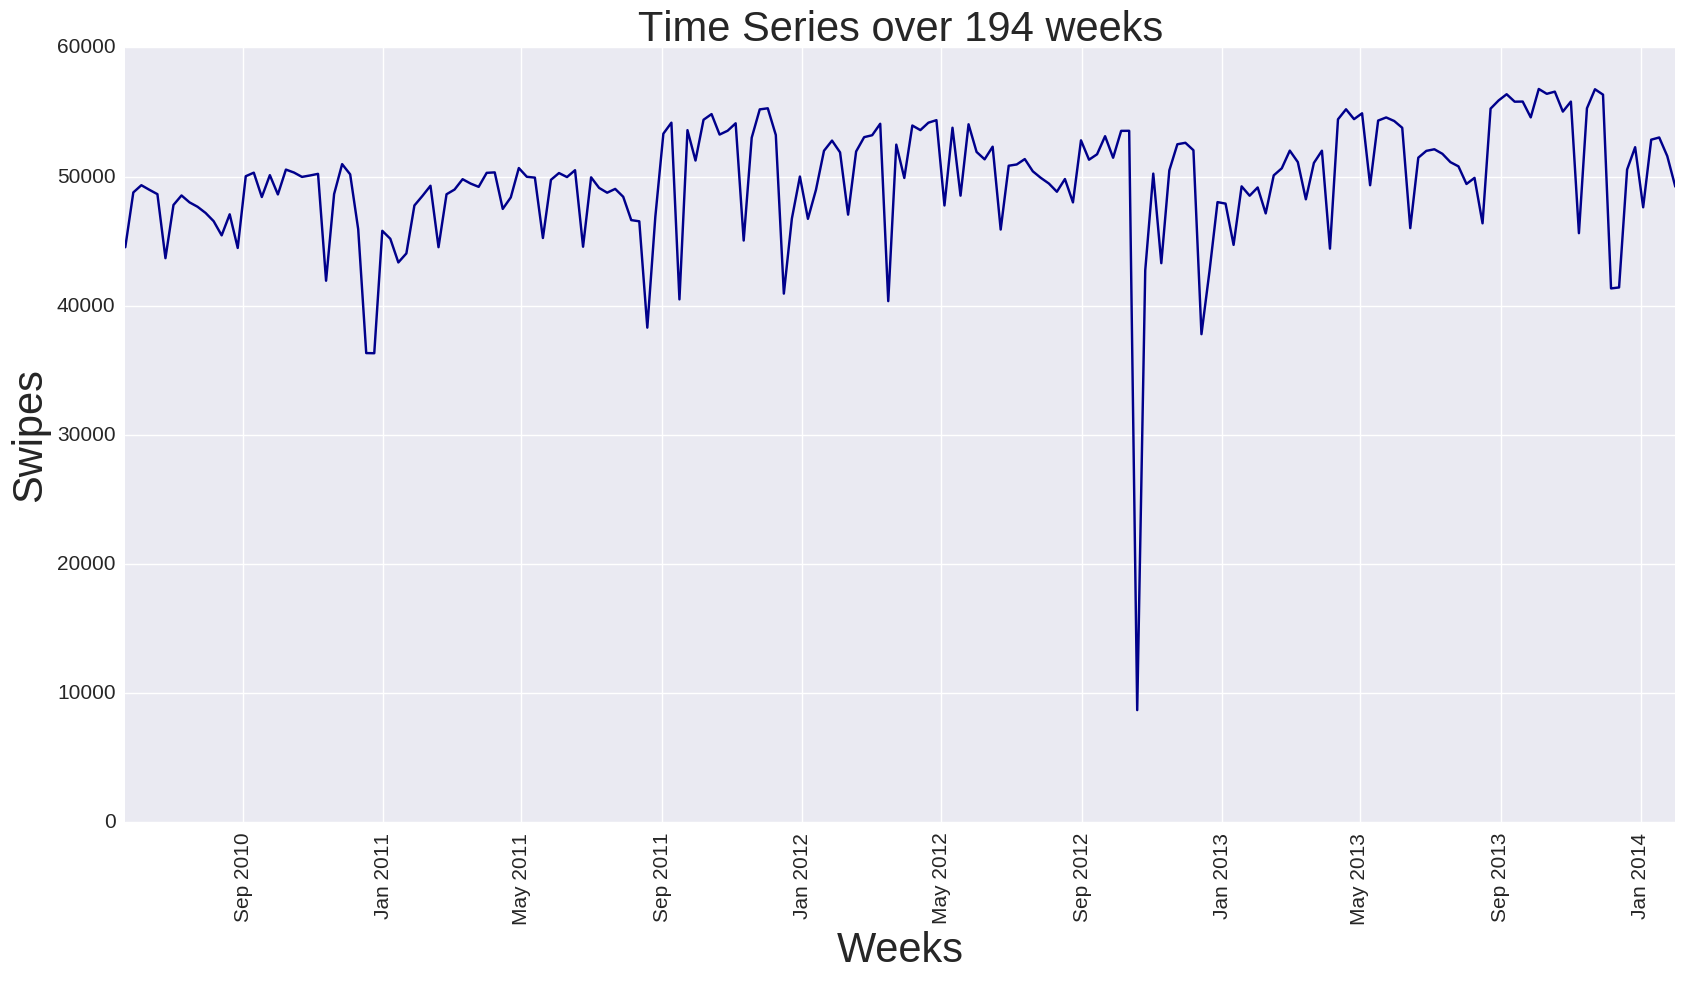

In [14]:
plt.figure(figsize(20, 10))
plt.plot (Stations_ts, color = 'DarkBlue')
plt.title( 'Time Series over 194 weeks', size = 30)
plt.xlabel('Weeks', size = 30)
plt.ylabel('Swipes', size = 30)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.show()

**CAPTION 1.:** 
Time Series of the swipes in the 600 Stations over the 194 weeks. The mean of the six hundred stations were taken in order to avoid having 600 timeseries. As it can be observed,There is a significant event around October.

In [15]:
print ("mean deaths by day {}".format(Stations_ts.mean()))
print ("stdev deaths by day {}".format(Stations_ts.std()))
thresholds = [Stations_ts.mean() + 3 * Stations_ts.std(), 
              Stations_ts.mean() - 3 * Stations_ts.std()]
print ("3-sigma thresholds {} {}".format(*thresholds))
print ("earliest datapoint", min(Stations_ts.index))

mean deaths by day Station    49635.583119
dtype: float64
stdev deaths by day Station    4986.134836
dtype: float64
3-sigma thresholds Station    64593.987626
dtype: float64 Station    34677.178611
dtype: float64
earliest datapoint 2010-05-21 00:00:00


In [16]:
print(thresholds[0])
print(thresholds[1])

Station    64593.987626
dtype: float64
Station    34677.178611
dtype: float64


In [17]:
Stations_ts.loc[(Stations_ts.Station < 34677.178611)]

,Station
0,
2012-10-19,8697.81


So the week that that drop the rides was **'2012-10-19'**

** Task 2: **

Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks) 

**Task 3: **

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)